# Test Architecture

We check that our stability training architecture is working expectedly with perturbed image packing and unpacking.

## Experiment

We import useful librairies

In [1]:
import sys, os 
sys.path.append(os.getcwd()+'/../src')
sys.path.append(os.getcwd()+'/../data')

import numpy
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

import architectures
import cifar10
import utils
import tensorflow as tf

We retrieve data:

In [2]:
X_test, y_test_lab = cifar10.load_cifar(dataset='testing', path=os.getcwd()+'/../data/cifar')
X_test = numpy.reshape(X_test, [X_test.shape[0], -1])
X_test = X_test/255.
X_test = X_test.astype(numpy.float32)
y_test = utils.labels_to_categoricals(y_test_lab)

We check that the data is in expected shape

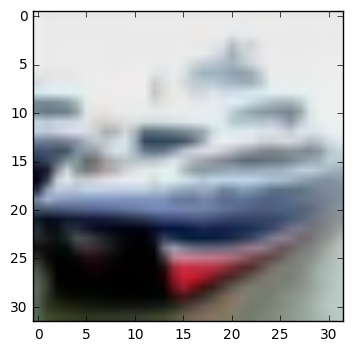

In [3]:
plt.imshow(numpy.reshape(X_test[1], [32,32,3]))

We define the architecture of the network

In [4]:
network = architectures.StabilizedCifarNet(os.getcwd()+'/Logs')
network.load('Networks/StabilityTrained')

In [5]:
in_dict={network._net_input:X_test[1:2]}

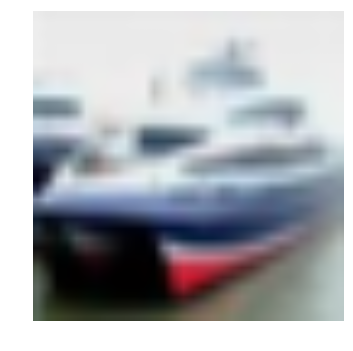

In [8]:
out = network.evaluate_tensor('Input/UnPerturbed:0', initial_dict='test', update_dict=in_dict)
plt.imshow(out[0])
plt.axis('off')
plt.savefig('Figures/UnPerturbed.pdf')

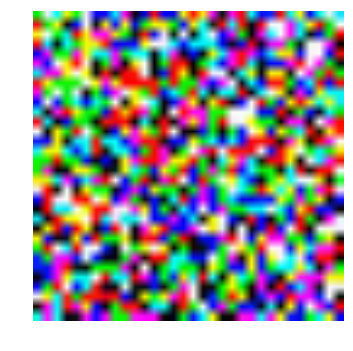

In [9]:
out = network.evaluate_tensor('Input/Pert:0', initial_dict='test', update_dict=in_dict)
plt.imshow(out[0])
plt.axis('off')
plt.savefig('Figures/Pert.pdf')

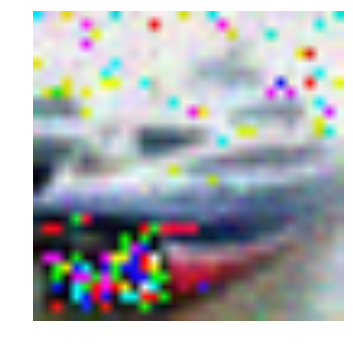

In [10]:
out = network.evaluate_tensor('Input/Perturbed:0', initial_dict='test', update_dict=in_dict)
plt.imshow(out[0])
plt.axis('off')
plt.savefig('Figures/Perturbed.pdf')